In [1]:
import sys
sys.path.insert(0, '/home/tim/Classes/CS535/PlanarGrasping/')

from shapely.geometry import Polygon, LineString, Point
from scipy.spatial.qhull import QhullError
from data_generation.utils import plot_shape
from data_generation.grasp_quality import shape_grasp_quality, plot_friction_cones, plot_grasp
from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [2]:
triangle = Polygon([(-1, -1), (1, -1), (0,1)])
shape_grasp_quality(triangle, 0, 0)
plot_grasp(triangle, 0, 0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
rectangle = Polygon([(-1, -1), (1, -1), (1,2), (-1,2)])
# rectangle = triangle
nrand = 100
grasps = []


for i in range(nrand):
    while True:
        theta = np.random.uniform(low=0, high=2*np.pi)
        b = np.random.uniform(low=-3, high=3)
        try:
            quality = shape_grasp_quality(rectangle, theta, b)
            grasps.append((theta, b, quality))
            break
        except ValueError as e:
            print(e)
        except QhullError as e:
            print(e)

Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line does not intersect shape.
Line doe

In [4]:
numtheta = 50
numb = 50
thetas = np.linspace(0, 2*np.pi, numtheta)
bs = np.linspace(-6, 6, numb)
qualities = np.nan * np.ones((numb, numtheta))

with tqdm(total=numb*numtheta) as progbar:
    for j, theta in enumerate(thetas):
        for i, b in enumerate(bs):
            try:
                qualities[i,j] = shape_grasp_quality(rectangle, theta, b)
                progbar.update()
            except ValueError:
                progbar.update()
                continue


100%|██████████| 2500/2500 [00:03<00:00, 831.92it/s]


Text(0.5, 1.0, 'Grasp Quality')

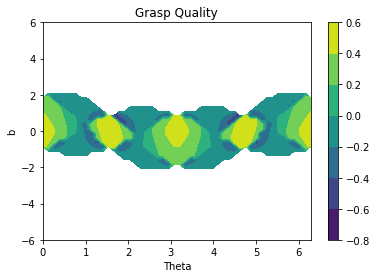

In [5]:
%matplotlib inline
fig, ax = plt.subplots()
cnt = ax.contourf(thetas, bs, qualities)
fig.colorbar(cnt)
ax.set_xlabel('Theta')
ax.set_ylabel('b')
ax.set_title('Grasp Quality')

In [6]:
shape_grasp_quality(rectangle, theta=1.5, b=-0.85)

0.42603251338005066

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
idxs = ~np.isnan(qualities)
T[idxs].ravel().shape

(652,)

In [20]:
B[idxs].ravel().shape

(652,)

In [21]:
qualities[idxs].ravel().shape

(652,)

In [22]:
%matplotlib widget
fig, axs = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5,5))
T, B = np.meshgrid(thetas, bs)
surf = ax.scatter(T.ravel(), B.ravel(), qualities.ravel())

fig.colorbar(surf)
ax.set_xlabel('Theta')
ax.set_ylabel('b')
ax.set_title('Grasp Quality')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0.92, 'Grasp Quality')

(-5.0, 5.0)

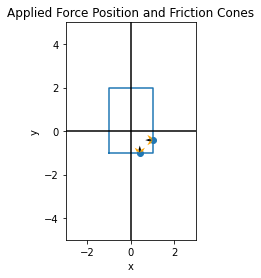

In [8]:
fig, ax = plt.subplots()
plot_shape(rectangle, ax)
# y = mx + b
plot_friction_cones(rectangle, np.pi/4, -1, ax)
ax.set_xlim([-3,3])
ax.set_ylim([-5,5])

In [21]:
shape_grasp_quality(rectangle, np.tan(np.pi), 0.5)

0.4850713014602661

In [24]:
shape_grasp_quality(rectangle, np.tan(np.pi/2 + 0.0001), -5)

0.5569669604301453

In [35]:
def line_endpoints(theta, b, t=100):
    """ Find endpoints of line parallel to a ray angle theta, with offset `b` to the left of the ray."""
    x0 = b * np.array([-np.sin(theta), np.cos(theta)])
    along = np.array([np.cos(theta), np.sin(theta)])
    return x0+(t*along), x0-(t*along)

theta = np.pi/6
left, right = line_endpoints(theta, 1, t=10)

In [36]:
left, right

(array([8.16025404, 5.8660254 ]), array([-9.16025404, -4.1339746 ]))

In [37]:
norm = np.array([-np.sin(theta), np.cos(theta)])
left.dot(norm)

1.0

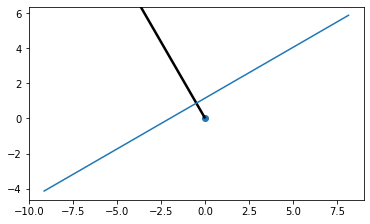

In [38]:
fig, ax = plt.subplots()
ax.plot([left[0], right[0]], [left[1], right[1]])
ax.scatter(0,0)
ax.quiver(0,0,norm[0], norm[1], scale=1)
ax.set_aspect('equal')